# Kalman filter
https://filterpy.readthedocs.io/en/latest/kalman/KalmanFilter.html
https://github.com/selfedu-rus/python-algorithms/blob/master/lesson%206.%20filter%20kalman.py

In [1]:
# ! git clone -b ml_and_stat_methods https://github.com/mipt-nd/novelty-detection.git
# %cd novelty-detection/

In [2]:
# ! pip install filterpy -q

In [3]:
import os
import random
import sys

import pandas as pd

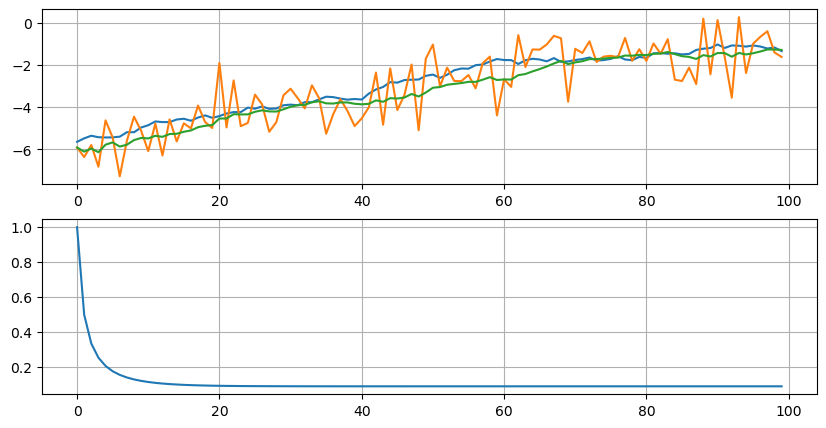

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 100         # число наблюдений
dNoise = 1      # дисперсия шума
dSignal = 5     # дисперсия сигнала
r = 0.99        # коэффициент корреляции в модели движения
en = 0.1        # дисперсия СВ в модели движения

x = np.zeros(N)                         # истинные координаты перемещения (пока просто нули)
x[0] = np.random.normal(0, dSignal)     # формирование первой координаты
for i in range(1, N):                   # формирование последующих координат по модели АР
    x[i] = r*x[i-1] + np.random.normal(0, en)

z = x + np.random.normal(0, dNoise, N)  # формирование наблюдений


# фильтрация сигнала с помощью фильтра Калмана
xx = np.zeros(N)    # вектор для хранения оценок перемещений
P = np.zeros(N)     # вектор для хранения дисперсий ошибок оценивания
xx[0] = z[0]        # первая оценка
P[0] = dNoise      # дисперсия первой оценки

# рекуррентное вычисление оценок по фильтру Калмана
for i in range(1, N):
    Pe = r*r*P[i-1]+en*en
    P[i] = (Pe*dNoise)/(Pe+dNoise)
    xx[i] = r*xx[i-1]+P[i]/dNoise*(z[i]-r*xx[i-1])

# отображение результатов
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

ax1.plot(x)
ax1.plot(z)
ax1.plot(xx)
ax1.grid(True)

ax2.plot(P)
ax2.grid(True)
plt.show()

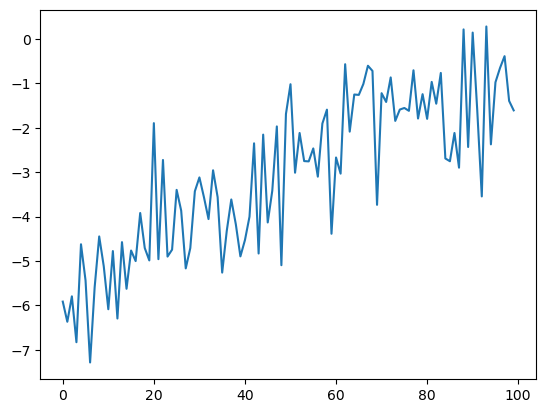

In [5]:
plt.plot(z)

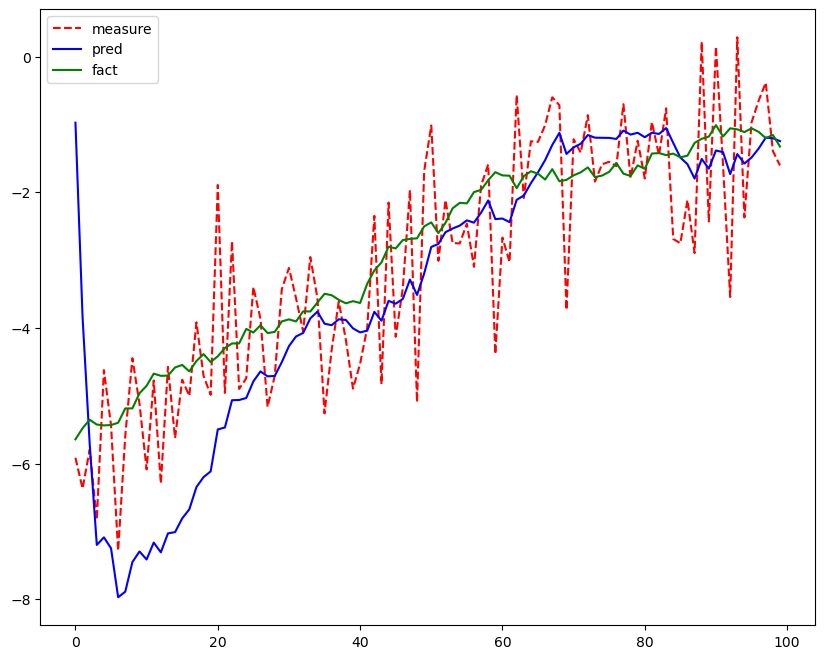

In [6]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import numpy as np

f = KalmanFilter(dim_x=2, dim_z=1)
f.x = np.array([[1.], [0.]])  # initial state
f.F = np.array([[1.,1.], [0.,1.]])  # state transition matrix
f.H = np.array([[1.,0.]])  # measurement function matrix
f.P = np.array([[1., 0.], [0., 1.]])  # state covariance matrix
f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.1)  # process noise matrix
f.R = np.array([[5.]])  # measurement noise matrix

preds = []

for measure in z:
    f.predict()
    f.update(measure)
    preds.append(f.x_post[0][0])
    
plt.figure(figsize=(10, 8))
plt.plot(z, 'r--', label='measure')
plt.plot(preds, 'b', label='pred')
plt.plot(x, 'g', label='fact')
plt.legend()
plt.show()

# Datasets

In [9]:
# SKAB data

all_files=[]
for root, dirs, files in os.walk("data_labeled/SKAB/"):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))

# формируем датафрейм
dfs=[]
for path in all_files:
    df = pd.read_csv(path,index_col='datetime',sep=';',parse_dates=True)
    # print(path, df.shape)
    dfs.append(df)
# print('Features:')
# for col in dfs[2].columns:
#     print('\t',col)
dfs = [df for df in dfs if df.shape[1] == 10]
df_skab = pd.concat(dfs)
# print(df_skab.shape)
df_skab = df_skab.drop_duplicates()
df_skab = df_skab.drop('changepoint', axis=1).reset_index().sort_index()
display(df_skab)

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly
0,2020-03-09 10:54:34,0.026990,0.040407,1.015510,0.382638,72.9570,25.6198,231.276,31.00100,0.0
1,2020-03-09 10:54:35,0.026836,0.039138,1.020390,0.054711,72.8664,25.6185,226.683,31.99900,0.0
2,2020-03-09 10:54:36,0.026597,0.040147,0.733759,0.054711,72.8498,25.6157,231.091,31.00100,0.0
3,2020-03-09 10:54:37,0.027161,0.040001,1.073280,0.382638,72.7915,25.6115,236.156,31.99900,0.0
4,2020-03-09 10:54:38,0.026703,0.039407,1.106890,0.054711,72.9818,25.6171,207.464,31.00100,0.0
...,...,...,...,...,...,...,...,...,...,...
36915,2020-02-08 19:32:15,0.105811,0.193051,1.291030,0.054711,86.1452,33.2491,208.855,122.47500,0.0
36916,2020-02-08 19:32:16,0.060570,0.077031,0.824930,0.382638,86.2657,33.2489,227.430,98.54010,0.0
36917,2020-02-08 19:32:17,0.024764,0.037350,0.293163,0.382638,86.5109,33.2445,228.719,69.18940,0.0
36918,2020-02-08 19:32:18,0.017131,0.016978,0.220920,0.054711,86.2620,33.2386,245.183,17.65750,0.0


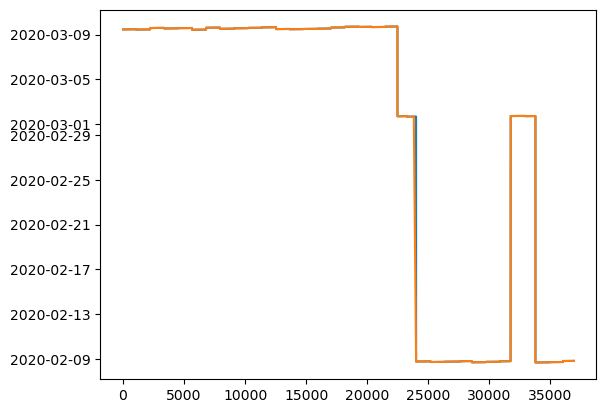

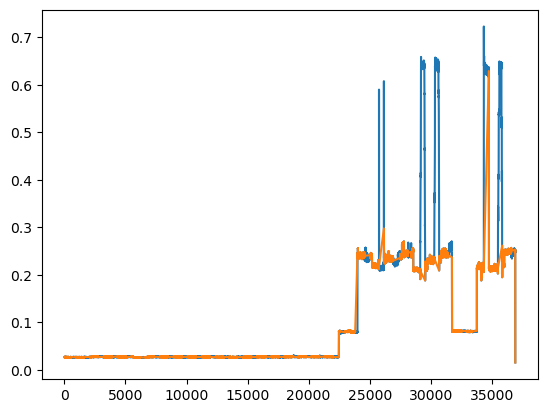

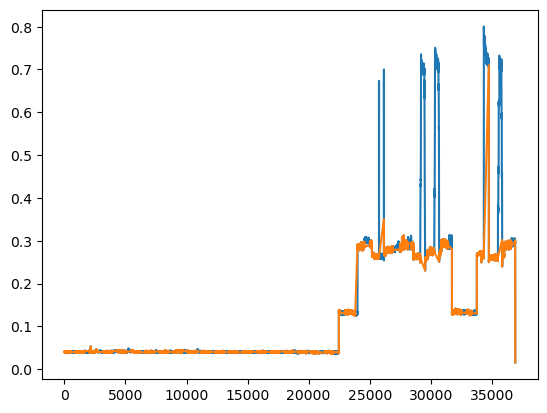

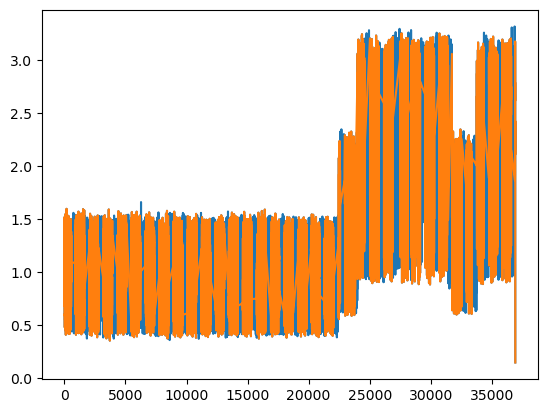

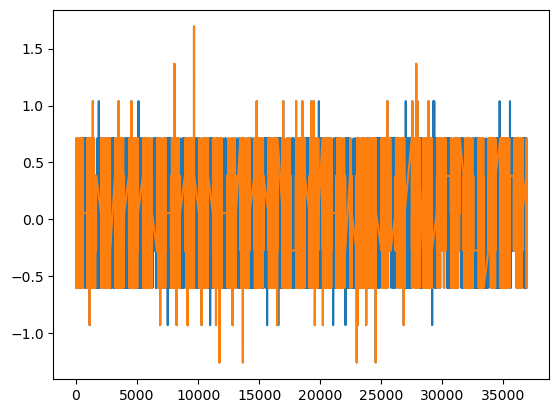

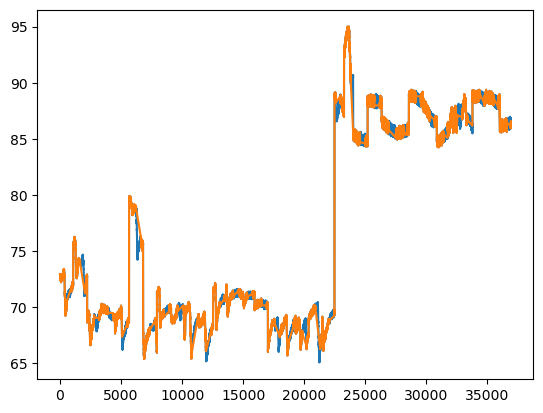

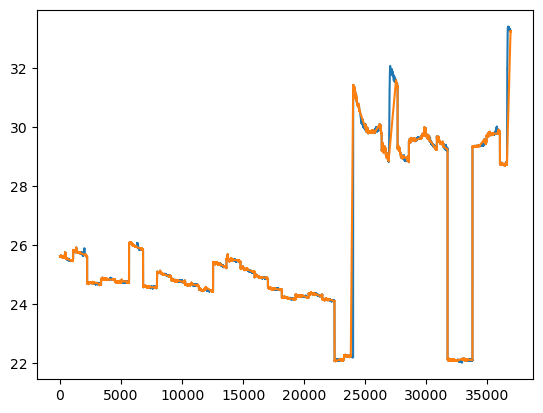

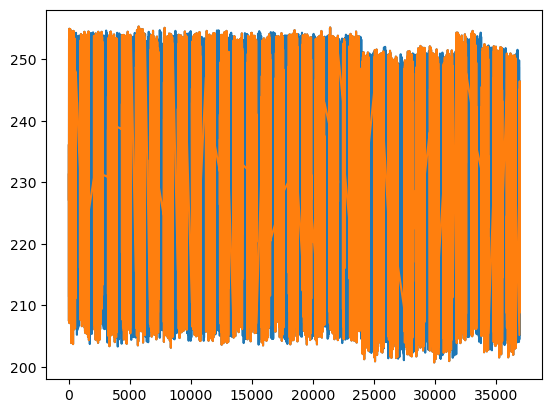

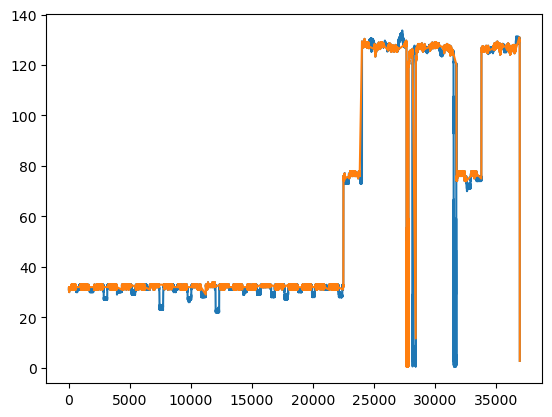

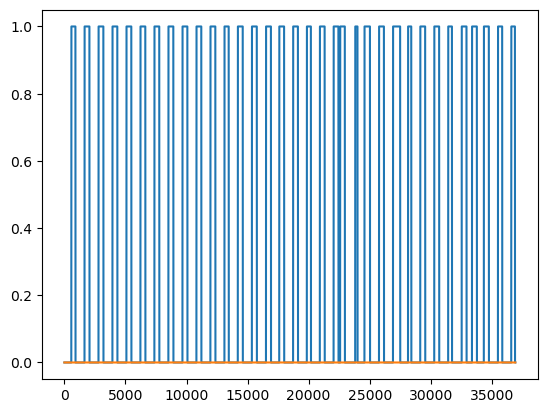

In [10]:
for col in df_skab.columns:
    plt.plot(df_skab[col])
    plt.plot(df_skab[df_skab['anomaly'] == 0][col])
    plt.show()

In [25]:
# Проверка стационарности ряда по тесту Дики-Фуллера
from statsmodels.tsa.stattools import adfuller


def check_adfuller(df, col):
    result = adfuller(df[col])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        return(f'Ряд {col} стационарен')
    else:
        return(f'Ряд {col} нестационарен. Возможно, есть аномалии в данных')

In [26]:
def kalman_filter(df, col, x):
    z = df[col]
    f = KalmanFilter(dim_x=2, dim_z=1)
    f.x = np.array([[1.], [0.]])  # initial state
    f.F = np.array([[1.,1.], [0.,1.]])  # state transition matrix
    f.H = np.array([[1.,0.]])  # measurement function matrix
    f.P = np.array([[1., 0.], [0., 1.]])  # state covariance matrix
    f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.1)  # process noise matrix
    f.R = np.array([[5.]])  # measurement noise matrix

    pred_list = []

    for measure in z:
        f.predict()
        f.update(measure)
        pred_list.append(f.x_post[0][0])

    preds = pd.Series(data=pred_list, index=z.index)
        
    plt.figure(figsize=(10, 8))
    plt.plot(z, 'r--', label='measure')
    plt.plot(preds, '--b', label='pred')
    plt.plot(x, 'g', label='fact')
    plt.title(f'{check_adfuller(df, col)}')
    plt.legend()
    plt.show()

p-value: 0.000529


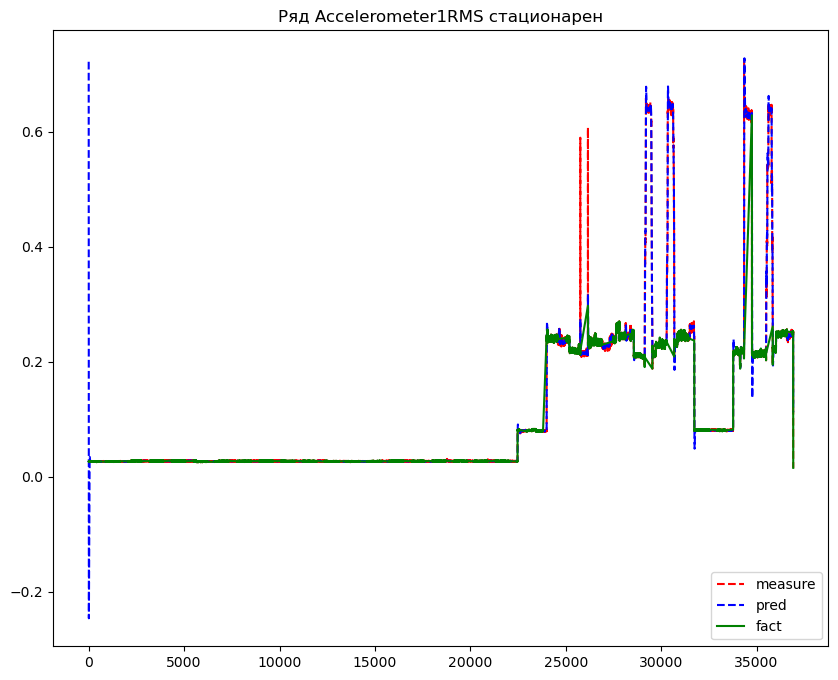

p-value: 0.000883


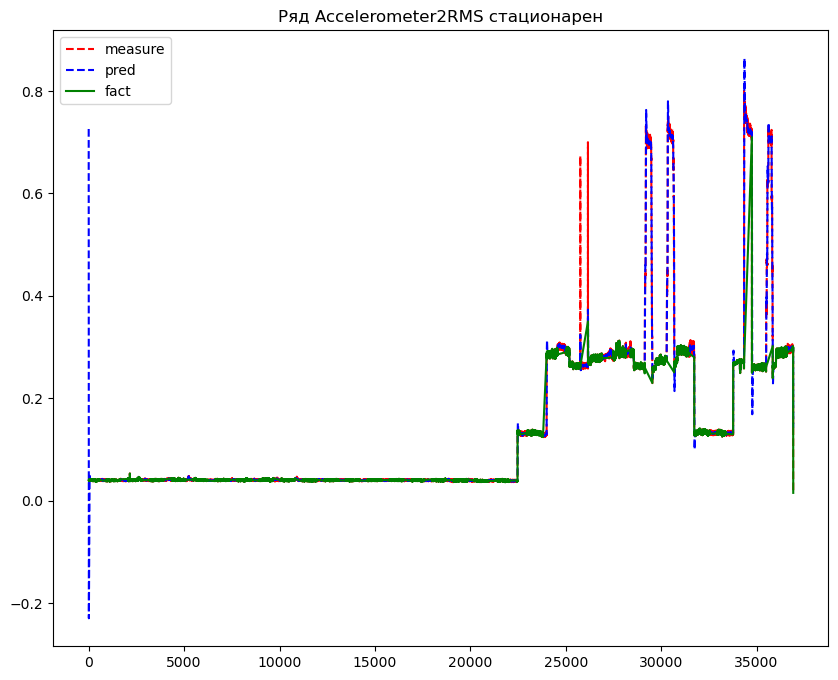

p-value: 0.000433


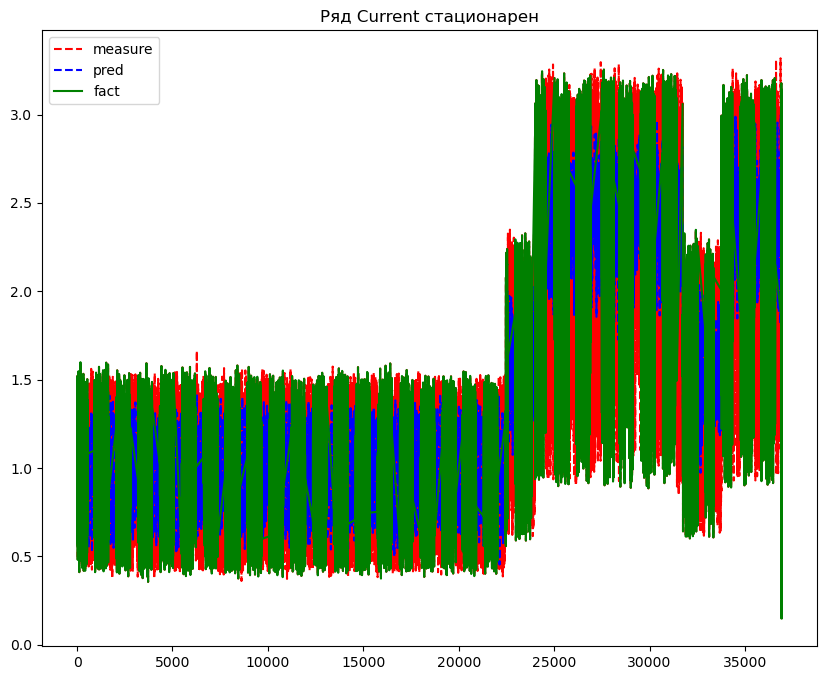

p-value: 0.000000


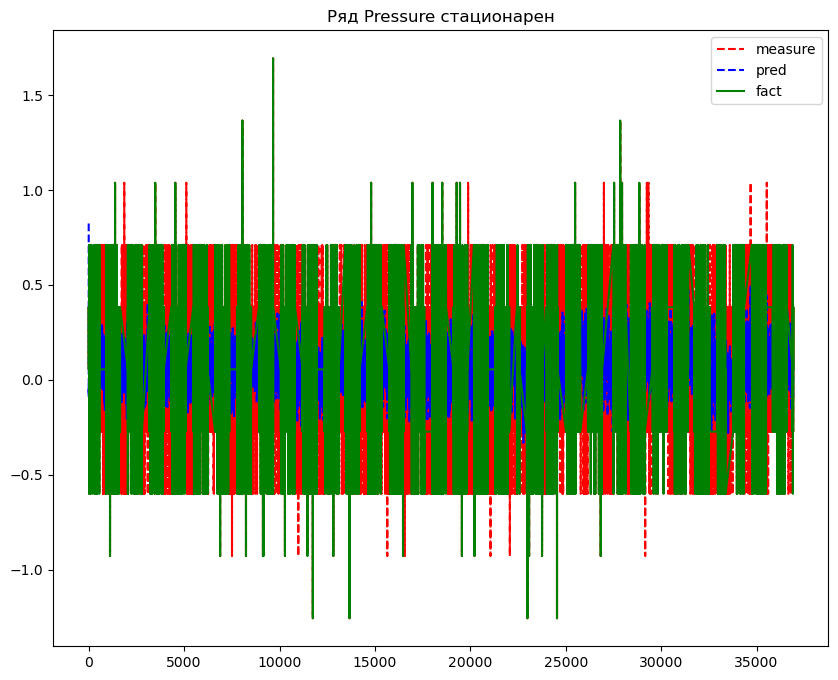

p-value: 0.509625


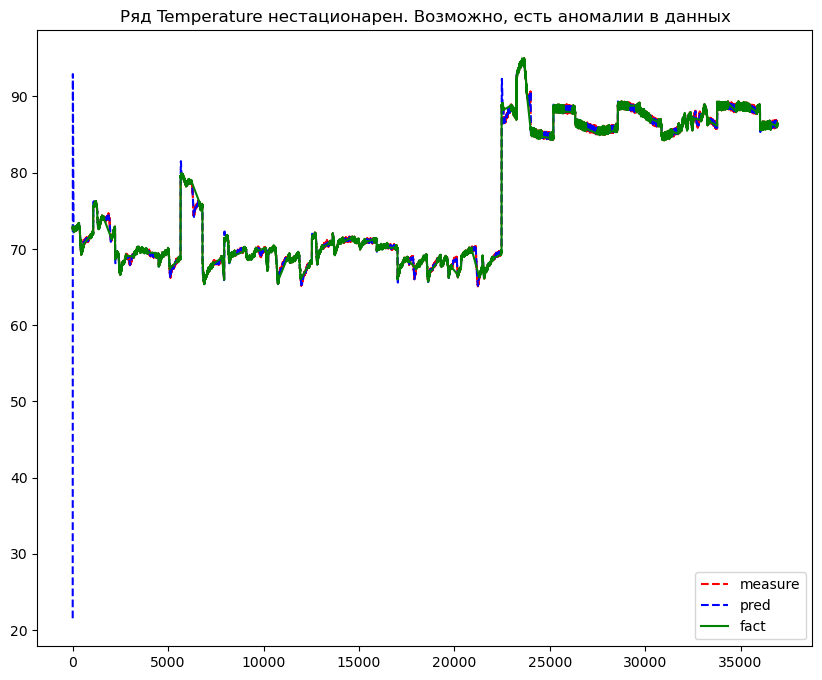

p-value: 0.260784


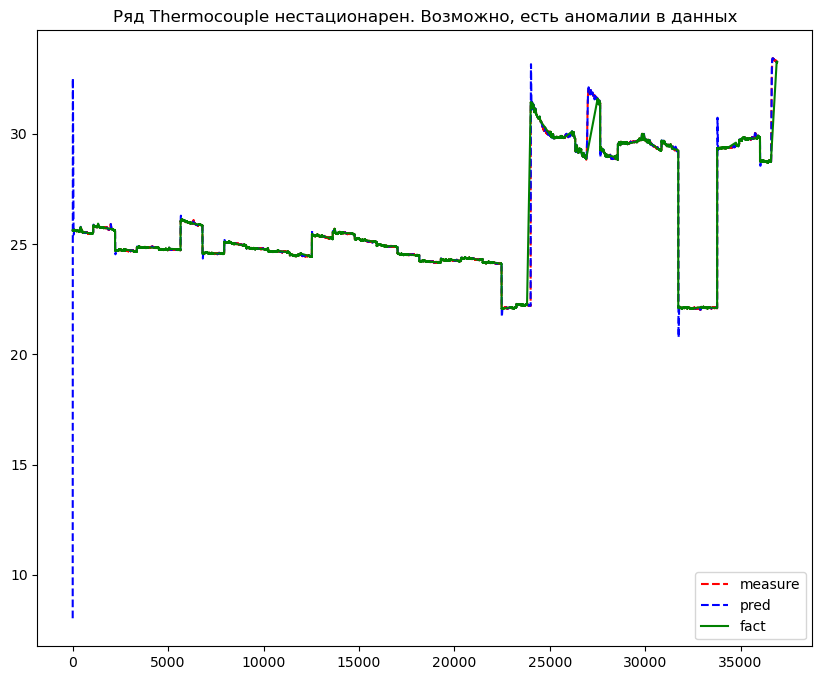

p-value: 0.000000


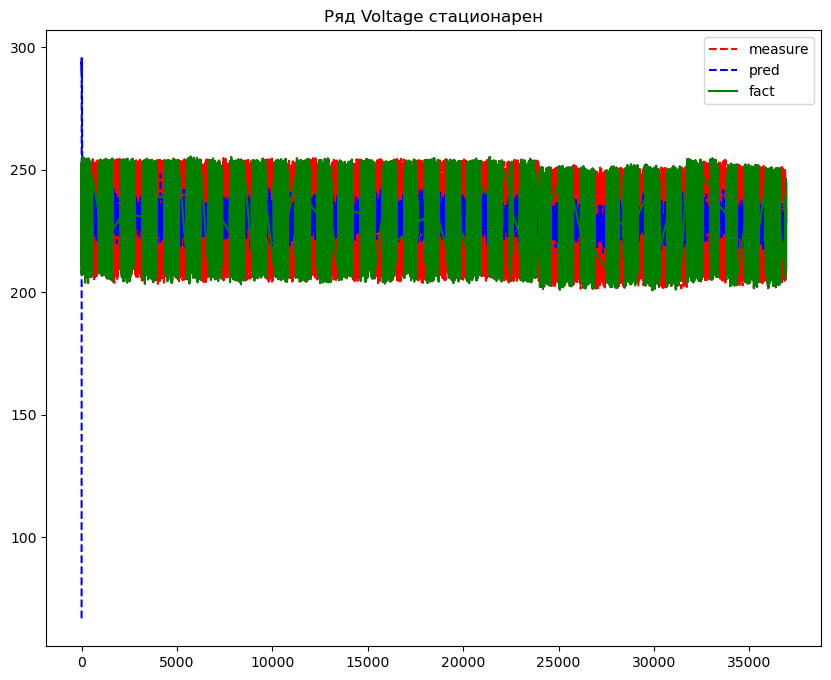

p-value: 0.072153


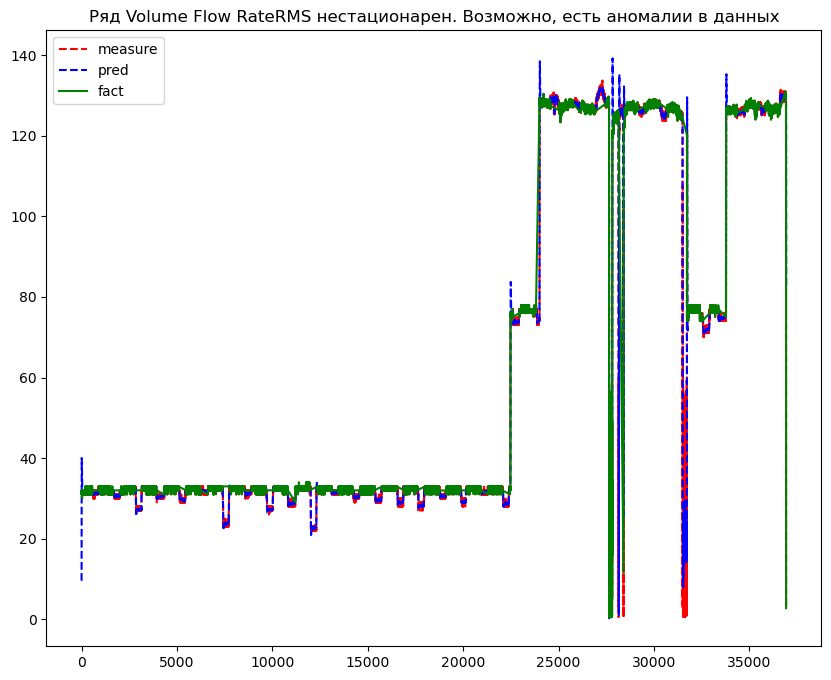

p-value: 0.000000


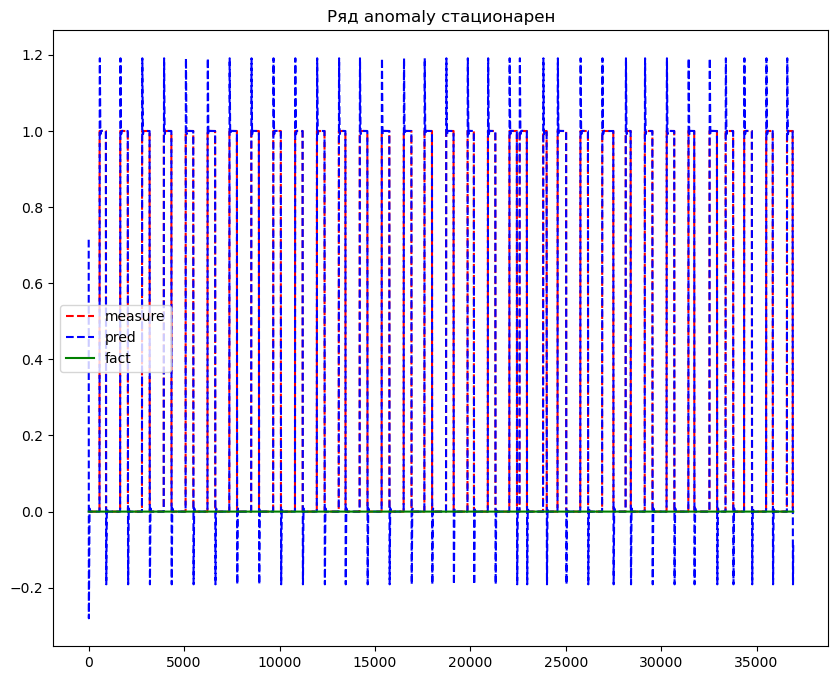

In [27]:
cols = list(df_skab.columns)
cols.remove('datetime')

for col in cols:
    kalman_filter(df_skab, col, df_skab[df_skab['anomaly'] == 0][col])